In this work, we tried to classifying salary using Random Forest classification. Predictor variable:

1. Gender
2. Age
3. EstimatedSalary
4. Purchased

---

In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


First we can take `Gender`, `Age`, `EstimatedSalary` and try to predict `Purchased` using the `sklearn.neighbors.KNeighborsClassifier` and then create our own class to Code `KNN` from scratch.

In [69]:
df = df.iloc[:, 1:]

In [70]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [71]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(20)

In [73]:
df = df.drop_duplicates(keep='first')

In [74]:
# Let's Label Encode Gender Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [75]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [76]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [77]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [78]:
print(X.head())
print(y.head())

   Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000
2       0   26            43000
3       0   27            57000
4       1   19            76000
0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [79]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []

for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test))

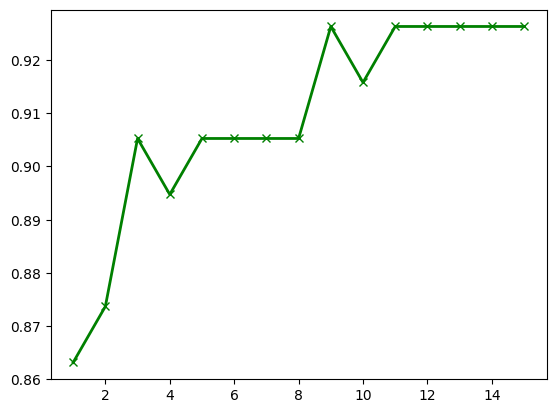

In [81]:
import matplotlib.pyplot as plt

plt.plot(range(1, 16), scores, color='green', marker='x', linestyle="-", linewidth=2)
plt.show()

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.9052631578947369

In [83]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.9263157894736842

The value of `k` is $12$ and we are getting accuracy of aroung $92$ percent.

##### KNN from Scratch

In [88]:
from collections import Counter
class Knn:
    def __init__(self,k):
        self.n_neighbors = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):

        y_pred = []
        for i in X_test:
        # * Calculate the distance with each training point
            distances = []
            for j in X_train:
                distances.append(self.calculate_distance(i ,j))
            n_neighbors = sorted(list(enumerate(distances)), key=lambda x: x[1])[0:self.n_neighbors]
            label = self.majority_count(n_neighbors)
            y_pred.append(label)
        return np.array(y_pred)

    def calculate_distance(self, point_A, point_B):
        return np.linalg.norm(point_A - point_B)
    
    def majority_count(self,neighbors):
        votes = []
        for i in neighbors:
            votes.append(self.y_train[i[0]])
        votes = Counter(votes)

        return votes.most_common()[0][0]


In [89]:
my_y_pred = knn.predict(X_test)
accuracy_score(my_y_pred, y_test)

0.9263157894736842